In [1]:
!unzip train.csv.zip -d /content/train.csv


Archive:  train.csv.zip
  inflating: /content/train.csv/train.csv  


In [2]:
import pandas as pd
import numpy as np


data=pd.read_csv('/content/train.csv/train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
features=["var3", "var15", "var38", "imp_op_var39_comer_ult1" ]
corelation= data[features].corr()
print(corelation)

                             var3     var15     var38  imp_op_var39_comer_ult1
var3                     1.000000 -0.004452  0.000071                 0.005989
var15                   -0.004452  1.000000  0.006497                 0.094762
var38                    0.000071  0.006497  1.000000                 0.012546
imp_op_var39_comer_ult1  0.005989  0.094762  0.012546                 1.000000


The correlation heatmap shows that some variables in the dataset exhibit strong linear relationships, as indicated by correlation values close to +1 or -1 (dark red and dark blue regions). These pairs of variables follow a linear trend. On the other hand, many variables have correlation values near 0, suggesting weak or no linear relationship. Therefore, the dataset is partially linear: certain variables are strongly linearly dependent, while others are not

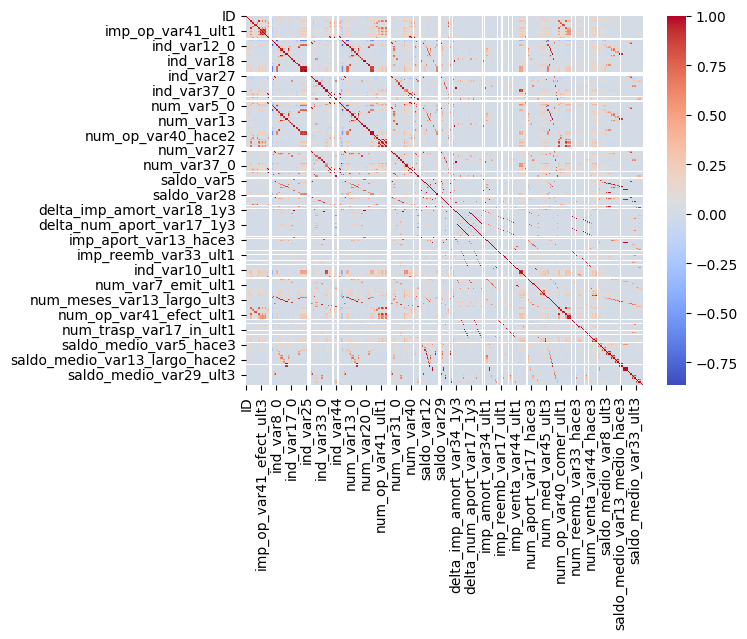

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.show()

In [10]:
print(data.isnull().sum())

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


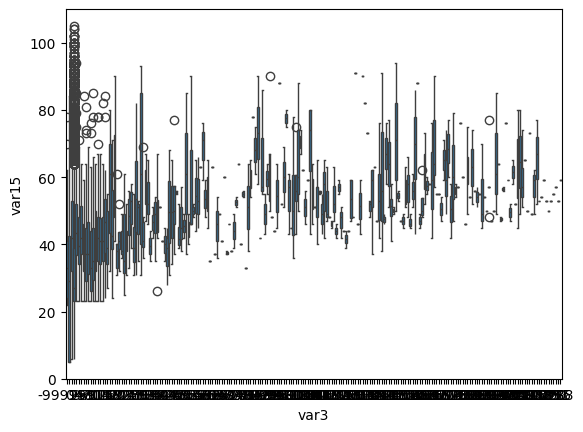

imp_ent_var16_ult1
0.00         60.439016
0.06          0.000000
0.30          0.000000
1.14          0.000000
1.20          0.000000
               ...    
124800.00     0.000000
129000.00     0.000000
129300.00     0.000000
135000.00     0.000000
210000.00     0.000000
Name: imp_op_var39_comer_ult1, Length: 596, dtype: float64


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7efadd897b00> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/usr/local/lib/python3.12/dist-packages/matplotlib_inline/backend_inline.py", line 126, in flush_figures
    return show(True)
           ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
           ^^^^^^^^^^^^^^
  File "<decorator-gen-2>", line 2, in __call__
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/formatters.py", line 224, in catch_format_error
    r = method(self, *args

In [ ]:

sns.boxplot(x="var3", y="var15", data=data)
plt.show()

print(data.groupby("imp_ent_var16_ult1")["imp_op_var39_comer_ult1"].mean())

sns.boxplot(x="var38", y="saldo_medio_var44_ult3", data=data)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include="saldo_medio_var44_ult2").corr(), annot=False, cmap="coolwarm")
plt.show()

if "Var38" in data.columns:
    sns.scatterplot(x="Var38", y="Income", data=data)
    plt.show()

In [14]:

print("Unique target categories:", data['target'].unique())
print("Target value counts:\n", data['target'].value_counts())

print("\nBalance ratio:")
print(data['target'].value_counts(normalize=True))


KeyError: 'target'

In [ ]:
from sklearn.utils import resample

majority_class = data[data['target'] == data['target'].mode()[0]]
minority_class = data[data['target'] != data['target'].mode()[0]]


minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

balancedData = pd.concat([majority_class, minority_upsampled])

print("After upsampling balance:")
print(balancedData['target'].value_counts())


In [ ]:
threshold = 0.65
corr_matrix = balancedData.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
selectedData = balancedData.drop(columns=to_drop)

print("Features before selection:", balancedData.shape[1])
print("Features after Pearson correlation selection:", selectedData.shape[1])


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Copy dataset
altData = balancedData.copy()

# Separate X, y
X = altData.drop(columns=["target"])
y = altData["target"]

# Keep only numeric features for selection
X_num = X.select_dtypes(include="number")

# Mutual Information Selection
selector = SelectKBest(mutual_info_classif, k=10)  # pick top 10 features
X_new = selector.fit_transform(X_num, y)

selected_features = X_num.columns[selector.get_support()]

print("Selected features (Mutual Information):")
print(selected_features)
